# **WORK IN PROGRESS**

In [ ]:
# Importing necessary libraries
import pandas as pd
import csv
from google.colab import files
import re
import nltk
nltk.download('stopwords')
nltk.download('all')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping co

In [ ]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
# gensim changed to gensim_models
import pyLDAvis.gensim_models  # Important
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 11.5 MB 219 kB/s 
     |████████████████████████████████| 15.7 MB 74 kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=7d6f21aeafd8c106dfaba8199e35d6499fc57e8a10b5f17446f8e8f15c5ae2dd
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into 

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
# list of the names of the json files
file_names = []
for i in range(14):
  if i<9:
    name = f"Jan0{i+1}.csv"
  elif i>=9:
    name = f"Jan{i+1}.csv"
  file_names.append(name)
print(file_names)

['Jan01.csv', 'Jan02.csv', 'Jan03.csv', 'Jan04.csv', 'Jan05.csv', 'Jan06.csv', 'Jan07.csv', 'Jan08.csv', 'Jan09.csv', 'Jan10.csv', 'Jan11.csv', 'Jan12.csv', 'Jan13.csv', 'Jan14.csv']


In [ ]:
all_files = []
for i in file_names:
  data = pd.read_csv(i)
  all_files.append(data)
print(all_files)

[                        File_Name                                     Processed_Text
0      thehindu_jan_1_file_2.json  ['nba', 'make', 'rocket', 'debut', 'win', 'kin...
1      thehindu_jan_1_file_3.json  ['decisive', 'glorious', 'land', 'king', 'chal...
2      thehindu_jan_1_file_4.json  ['born', 'queen', 'take', 'south', 'india', 'o...
3      thehindu_jan_1_file_6.json  ['indigo', 'server', 'hacked', 'december', 'in...
4      thehindu_jan_1_file_7.json  ['sony', 'launch', 'playstation', 'india', 'fe...
..                            ...                                                ...
382  thehindu_jan_1_file_421.json  ['aai', 'give', 'height', 'clearance', 'new', ...
383  thehindu_jan_1_file_422.json  ['amma', 'clinic', 'opened', 'pudukottai', 'di...
384  thehindu_jan_1_file_423.json  ['elderly', 'woman', 'found', 'murdered', 'tir...
385  thehindu_jan_1_file_426.json  ['curb', 'keep', 'crowd', 'bay', 'celebration'...
386  thehindu_jan_1_file_431.json  ['engendered', 'endangered', 

In [ ]:
df_data = pd.concat(all_files)

In [ ]:
print(df_data)

                         File_Name  ... Unnamed: 0
0       thehindu_jan_1_file_2.json  ...        NaN
1       thehindu_jan_1_file_3.json  ...        NaN
2       thehindu_jan_1_file_4.json  ...        NaN
3       thehindu_jan_1_file_6.json  ...        NaN
4       thehindu_jan_1_file_7.json  ...        NaN
..                             ...  ...        ...
210  thehindu_jan_14_file_231.json  ...        NaN
211  thehindu_jan_14_file_232.json  ...        NaN
212  thehindu_jan_14_file_233.json  ...        NaN
213  thehindu_jan_14_file_234.json  ...        NaN
214  thehindu_jan_14_file_235.json  ...        NaN

[4737 rows x 3 columns]


In [ ]:
df_data = df_data.rename({'Processed_Text': 'Text'}, axis='columns')

In [ ]:
print(df_data["Text"])

0      ['nba', 'make', 'rocket', 'debut', 'win', 'kin...
1      ['decisive', 'glorious', 'land', 'king', 'chal...
2      ['born', 'queen', 'take', 'south', 'india', 'o...
3      ['indigo', 'server', 'hacked', 'december', 'in...
4      ['sony', 'launch', 'playstation', 'india', 'fe...
                             ...                        
210    ['petrol', 'diesel', 'price', 'hiked', 'scale'...
211    ['rupee', 'gain', 'paisa', 'finish', 'dollarat...
212    ['rupee', 'slip', 'paisa', 'us_dollar', 'early...
213    ['sensex', 'drop', 'point', 'early', 'trade', ...
214    ['view', 'hindu', 'crosswordslearn', 'crack', ...
Name: Text, Length: 4737, dtype: object


In [ ]:
# Removing all '\n', '\r', '\t' elements
# Using strip() and replace() to remove whitespaces
for i in range(len(df_data)):
  # Removing ' \\n ' 
  df_data['Text'].values[i] = re.sub(r"\\n", " ", df_data['Text'].values[i])
  # Removing ' \\r ' 
  df_data['Text'].values[i] = re.sub(r"\\r", " ", df_data['Text'].values[i])
    # Removing ' \\u ' 
  df_data['Text'].values[i] = re.sub(r"\\u ", " ", df_data['Text'].values[i])
  # Removing all '\'
  df_data['Text'].values[i] = re.sub(r"\W", " ", df_data['Text'].values[i])
  # REmoving all '\\t'
  df_data['Text'].values[i] = re.sub(r"\\t", " ", df_data['Text'].values[i])
  df_data['Text'].values[i] = " ".join(df_data['Text'].values[i].split())
  # Removing first element 'text'
  df_data['Text'].values[i] = df_data['Text'].values[i].split(' ', 1)[1]
  # Removing any URLs present in the dataframe
  df_data['Text'].values[i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', df_data['Text'].values[i], flags=re.MULTILINE)
df_data['Text']

0      make rocket debut win king raptor end worst st...
1      glorious land king chala cape cod work well de...
2      queen take south india oak style rewarding exc...
3      server hacked december internal document may g...
4      launch playstation india february preorders be...
                             ...                        
210    diesel price hiked scale new highsin mumbai pr...
211    gain paisa finish dollarat interbank forex mar...
212    slip paisa us_dollar early tradetraders invest...
213    drop point early trade nifty test according tr...
214    hindu crosswordslearn crack cryptic crosswords...
Name: Text, Length: 4737, dtype: object

In [ ]:
# Function to perform Tokenizing 
def tokenizing(Text):
  split = re.split('\W+', Text)
  return split

In [ ]:
# Tokenizing after changing all elements to lower-case 
df_data['Text']=df_data['Text'].apply(lambda x: tokenizing(x.lower()))

In [ ]:
def listToString(s): 
    str1 = " " 
    return (str1.join(s))
for m in range(len(df_data)):
 df_data['Text'].values[m] = listToString(df_data['Text'].values[m])


In [ ]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS |= {"the", "jul", "pm", "https", "www", "printable", "version", "thehindu", "com", "news", "ece", 
               "s", "t", "d", "m", "article", "b", "rb","cwe", "click", "subscribe", "photo", "credit", "said", "topvpn",
               "right", "caused", "said", "people", "city", "official", "said", "year", "state", "held"}
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
for m in range(len(df_data)):
  text =df_data['Text'].values[m]
    #"nlp" Object is used to create documents with linguistic annotations.
  my_doc = nlp(text)

  # Create list of word tokens
  token_list = []
  for token in my_doc:
    token_list.append(token.text)

  # Create list of word tokens after removing stopwords
  filtered_sentence =[] 

  for word in token_list:
   lexeme = nlp.vocab[word]
   if lexeme.is_stop == False:
        filtered_sentence.append(word) 
  r = filtered_sentence
  df_data['Text'].values[m] = r

In [ ]:
text_list = []
for j in range(len(df_data)):
  for i in df_data['Text'].values[j]:
    text_list.append(i)
len(text_list)

838811

In [ ]:
text_list

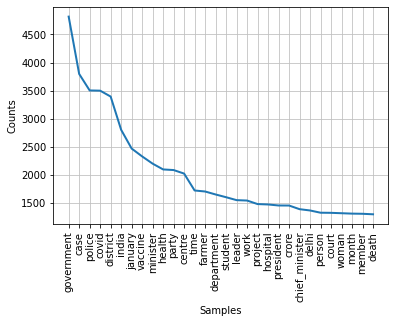

In [ ]:
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
data_analysis = nltk.FreqDist(text_list)
  
  # Let's take the specific words only if their frequency is greater than 3.
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
  
  #for key in sorted(filter_words):
  #    print("%s: %s" % (key, filter_words[key]))
  
data_analysis = nltk.FreqDist(filter_words)
data_analysis.plot(30, cumulative=False)

In [ ]:
# Observing one element of the dataframe
print(df_data["Text"])

0      [rocket, debut, win, king, raptor, end, worst,...
1      [glorious, land, king, chala, cape, cod, work,...
2      [queen, south, india, oak, style, rewarding, e...
3      [server, hacked, december, internal, document,...
4      [launch, playstation, india, february, preorde...
                             ...                        
210    [diesel, price, hiked, scale, new, highsin, mu...
211    [gain, paisa, finish, dollarat, interbank, for...
212    [slip, paisa, us_dollar, early, tradetraders, ...
213    [drop, point, early, trade, nifty, test, accor...
214    [hindu, crosswordslearn, crack, cryptic, cross...
Name: Text, Length: 4737, dtype: object


# **TRAIN TEST SPLIT**

In [ ]:
import sklearn
train, test = sklearn.model_selection.train_test_split(df_data, test_size=0.10, random_state=42 )

In [ ]:
print("Train Feature set:\t"+str(len(train)))
print("Train Feature set:\t"+str(len(test)))

Train Feature set:	4263
Train Feature set:	474


**EMBEDDINGS**

> **BAG OF WORDS**

In [ ]:
data =df_data["Text"].tolist()

In [ ]:
print(data[0])

['rocket', 'debut', 'win', 'king', 'raptor', 'end', 'worst', 'start', 'season', 'defeat', 'new', 'york', 'knicks', 'bang', 'houston', 'rocket', 'guard', 'return', 'action', 'count', 'sacramento', 'king', 'scored', 'game', 'high', 'point', 'finished', 'doubledouble', 'game', 'houston', 'rocket', 'beat', 'sacramento', 'king', 'thursdaywall', 'tallied', 'point', 'assist', 'rocket', 'playing', 'game', 'demarcus', 'cousin', 'acquired', 'washington', 'wizard', 'sank', 'freethrows', 'late', 'game', 'rocket', 'win', 'king', 'chance', 'tie', 'missed', 'final', 'second', 'crowd', 'texasharden', 'assist', 'rebound', 'game', 'twogame', 'set', 'king', 'joel', 'embiid', 'delivered', 'point', 'rebound', 'philadelphia', 'sank', 'threepointers', 'hand', 'orlando', 'magic', 'loss', 'new', 'season', 'winembiid', 'scored', 'point', 'quarter', 'sixer', 'sank', 'attempt', 'threepoint', 'range', 'fan', 'amway', 'center', 'toronto', 'raptor', 'posted', 'win', 'season', 'putting', 'halt', 'worst', 'start', 're

In [ ]:
list_clean = []
# Removing all words which have less than 4 letters 
for i in data:
  clean = []
  for x in i:
    clean.append(x)
  list_clean.append(clean)
data = list_clean

In [ ]:
data

[['rocket',
  'debut',
  'win',
  'king',
  'raptor',
  'end',
  'worst',
  'start',
  'season',
  'defeat',
  'new',
  'york',
  'knicks',
  'bang',
  'houston',
  'rocket',
  'guard',
  'return',
  'action',
  'count',
  'sacramento',
  'king',
  'scored',
  'game',
  'high',
  'point',
  'finished',
  'doubledouble',
  'game',
  'houston',
  'rocket',
  'beat',
  'sacramento',
  'king',
  'thursdaywall',
  'tallied',
  'point',
  'assist',
  'rocket',
  'playing',
  'game',
  'demarcus',
  'cousin',
  'acquired',
  'washington',
  'wizard',
  'sank',
  'freethrows',
  'late',
  'game',
  'rocket',
  'win',
  'king',
  'chance',
  'tie',
  'missed',
  'final',
  'second',
  'crowd',
  'texasharden',
  'assist',
  'rebound',
  'game',
  'twogame',
  'set',
  'king',
  'joel',
  'embiid',
  'delivered',
  'point',
  'rebound',
  'philadelphia',
  'sank',
  'threepointers',
  'hand',
  'orlando',
  'magic',
  'loss',
  'new',
  'season',
  'winembiid',
  'scored',
  'point',
  'quarter'

In [ ]:
print(train["Text"])

103    [urged, recommend, new, district, hospital, ra...
86     [loss, series, tweet, congress, stronghold, ka...
276    [policy, exclusively, coastal, district, day, ...
149    [phase, venue, person, allowed, forced, contin...
250    [land, retrieved, ministerforest, minister, hi...
                             ...                        
269    [celebrates, pongal, traditional, waysivaganga...
79     [hold, meeting, seer, maharashtra, raise, fund...
322    [apollo, vaccination, centre, presence, union,...
20     [mogul, gop, power, broker, diesthe, chairman,...
146    [vaccine, dry_run, smoothly, belagavi, distric...
Name: Text, Length: 4263, dtype: object


In [ ]:
 from gensim import corpora
# Creating a Dictionary as input to the LDA model 
dictionary = corpora.Dictionary(train["Text"])

# Creating corpus
corp = train["Text"]

corpus = [dictionary.doc2bow(text) for text in corp]
print(corpus)


In [ ]:
# Using the TF-IDF Embedding technique
from gensim import corpora, models
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
# Defining  a function to compute the coherence value based on the different values of hyperparamenters
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=10,
                                           chunksize=a,
                                           iterations = b,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [41]:

import numpy as np
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 11
max_topics = 35
step_size = 3
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
chuncksize = list(np.arange(100, 150, 500))
#alpha.append('symmetric')
#alpha.append('asymmetric')
# Beta parameter
iterations = list(np.arange(50, 100, 150))
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'chunksize': [],
                 'iterations': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in chuncksize:
                # iterare through beta values
                for b in iterations:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)
                                                
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['chunksize'].append(a)
                    model_results['iterations'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    
    pbar.close()


  3%|▎         | 16/540 [32:43<17:51:28, 122.69s/it]


In [43]:
df_hyp = pd.DataFrame(model_results)

In [44]:
print(df_hyp)

   Validation_Set  Topics  chunksize  iterations  Coherence
0      75% Corpus      11        100          50   0.507559
1      75% Corpus      14        100          50   0.496183
2      75% Corpus      17        100          50   0.517634
3      75% Corpus      20        100          50   0.487715
4      75% Corpus      23        100          50   0.519572
5      75% Corpus      26        100          50   0.539649
6      75% Corpus      29        100          50   0.525987
7      75% Corpus      32        100          50   0.502049
8     100% Corpus      11        100          50   0.484603
9     100% Corpus      14        100          50   0.515045
10    100% Corpus      17        100          50   0.515230
11    100% Corpus      20        100          50   0.530497
12    100% Corpus      23        100          50   0.528127
13    100% Corpus      26        100          50   0.529033
14    100% Corpus      29        100          50   0.527463
15    100% Corpus      32        100    

**BUILDING THE TOPIC MODEL**

**USING BAG OF WORDS**

In [ ]:
# LDA Model building 
#, alpha = 0.5, eta = 1.6, passes= 10, workers=2, chunksize = 100, iterations= 150 , alpha=0.5, eta=1.6 , alpha = 8
lda_model = gensim.models.LdaMulticore(corpus, num_topics=25 , id2word=dictionary, random_state=10, chunksize = 100, passes= 20, workers=4, iterations=100, alpha=0.5)

In [ ]:
# Viewing the topics formed
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.017*"village" + 0.017*"fire" + 0.014*"award" + 0.007*"song" + 0.007*"variety" + 0.006*"tree" + 0.005*"best" + 0.005*"paddy" + 0.005*"crop" + 0.005*"black"
Topic: 1 
Words: 0.022*"coimbatore" + 0.012*"camp" + 0.009*"report" + 0.008*"card" + 0.007*"tiruppur" + 0.007*"new" + 0.006*"salem" + 0.006*"released" + 0.006*"case" + 0.005*"social"
Topic: 2 
Words: 0.018*"film" + 0.009*"actor" + 0.008*"user" + 0.007*"platform" + 0.006*"theatre" + 0.005*"cinema" + 0.005*"like" + 0.005*"google" + 0.005*"release" + 0.005*"movie"
Topic: 3 
Words: 0.019*"court" + 0.018*"government" + 0.012*"order" + 0.009*"case" + 0.008*"act" + 0.007*"justice" + 0.007*"action" + 0.006*"issued" + 0.006*"high_court" + 0.005*"issue"
Topic: 4 
Words: 0.009*"crisis" + 0.007*"elections_marred" + 0.007*"pok_legislative" + 0.006*"code" + 0.006*"building" + 0.005*"nuclear" + 0.005*"led" + 0.005*"hyderabad" + 0.005*"linked" + 0.005*"protest"
Topic: 5 
Words: 0.024*"temple" + 0.014*"government" + 0.013*"tax" + 0

**USING TF-IDF**

In [ ]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictionary, passes=20, workers=4, random_state= 10, chunksize = 100)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
    #, alpha= 0.01,eta = 0.15

Topic: 0 Word: 0.002*"union_territory" + 0.001*"museum" + 0.001*"trip" + 0.001*"cryptic" + 0.001*"chairperson" + 0.001*"clue" + 0.001*"song" + 0.001*"govt" + 0.001*"knocking" + 0.001*"input"
Topic: 1 Word: 0.002*"excise" + 0.001*"padmanabhapuram" + 0.001*"industrialist" + 0.001*"chouhan" + 0.001*"stolen" + 0.001*"ramanathapuram" + 0.001*"consuming" + 0.001*"main_accused" + 0.001*"pollachi" + 0.001*"transaction"
Topic: 2 Word: 0.003*"sec" + 0.002*"kuwy" + 0.001*"aift" + 0.001*"ammunition" + 0.001*"ramesh" + 0.001*"whatsapp" + 0.001*"nomination" + 0.001*"trs" + 0.001*"audit" + 0.001*"traveller"
Topic: 3 Word: 0.003*"police" + 0.003*"vaccine" + 0.003*"case" + 0.002*"party" + 0.002*"district" + 0.002*"government" + 0.002*"covid" + 0.002*"farmer" + 0.002*"health" + 0.002*"new"
Topic: 4 Word: 0.001*"follower" + 0.001*"puri" + 0.001*"aviation" + 0.001*"ccb" + 0.001*"literature" + 0.001*"natural_gas" + 0.001*"borrower" + 0.001*"scst" + 0.001*"hamper" + 0.001*"raising"
Topic: 5 Word: 0.002*"pud

**MODEL EVALUATION**

In [ ]:
# Compute Perplexity

print("With Bag Of Words:\n")
print('\nPerplexity with BoW: ', lda_model.log_perplexity(corpus), )  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data, dictionary=dictionary, coherence='c_v')

coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score using BOW: ', coherence_lda)

With Bag Of Words:


Perplexity with BoW:  -8.654380443471432

Coherence Score using BOW:  0.5454022880786081


In [ ]:
coherence_model_TFIDF = CoherenceModel(model=lda_model_tfidf, texts=data, dictionary=dictionary, coherence='c_v')
coherence_TFIDF = coherence_model_TFIDF.get_coherence()
print('\nCoherence Score using TFIDF: ', coherence_TFIDF)


Coherence Score using TFIDF:  0.5627953257917967


**MODEL VISUALIZATION**

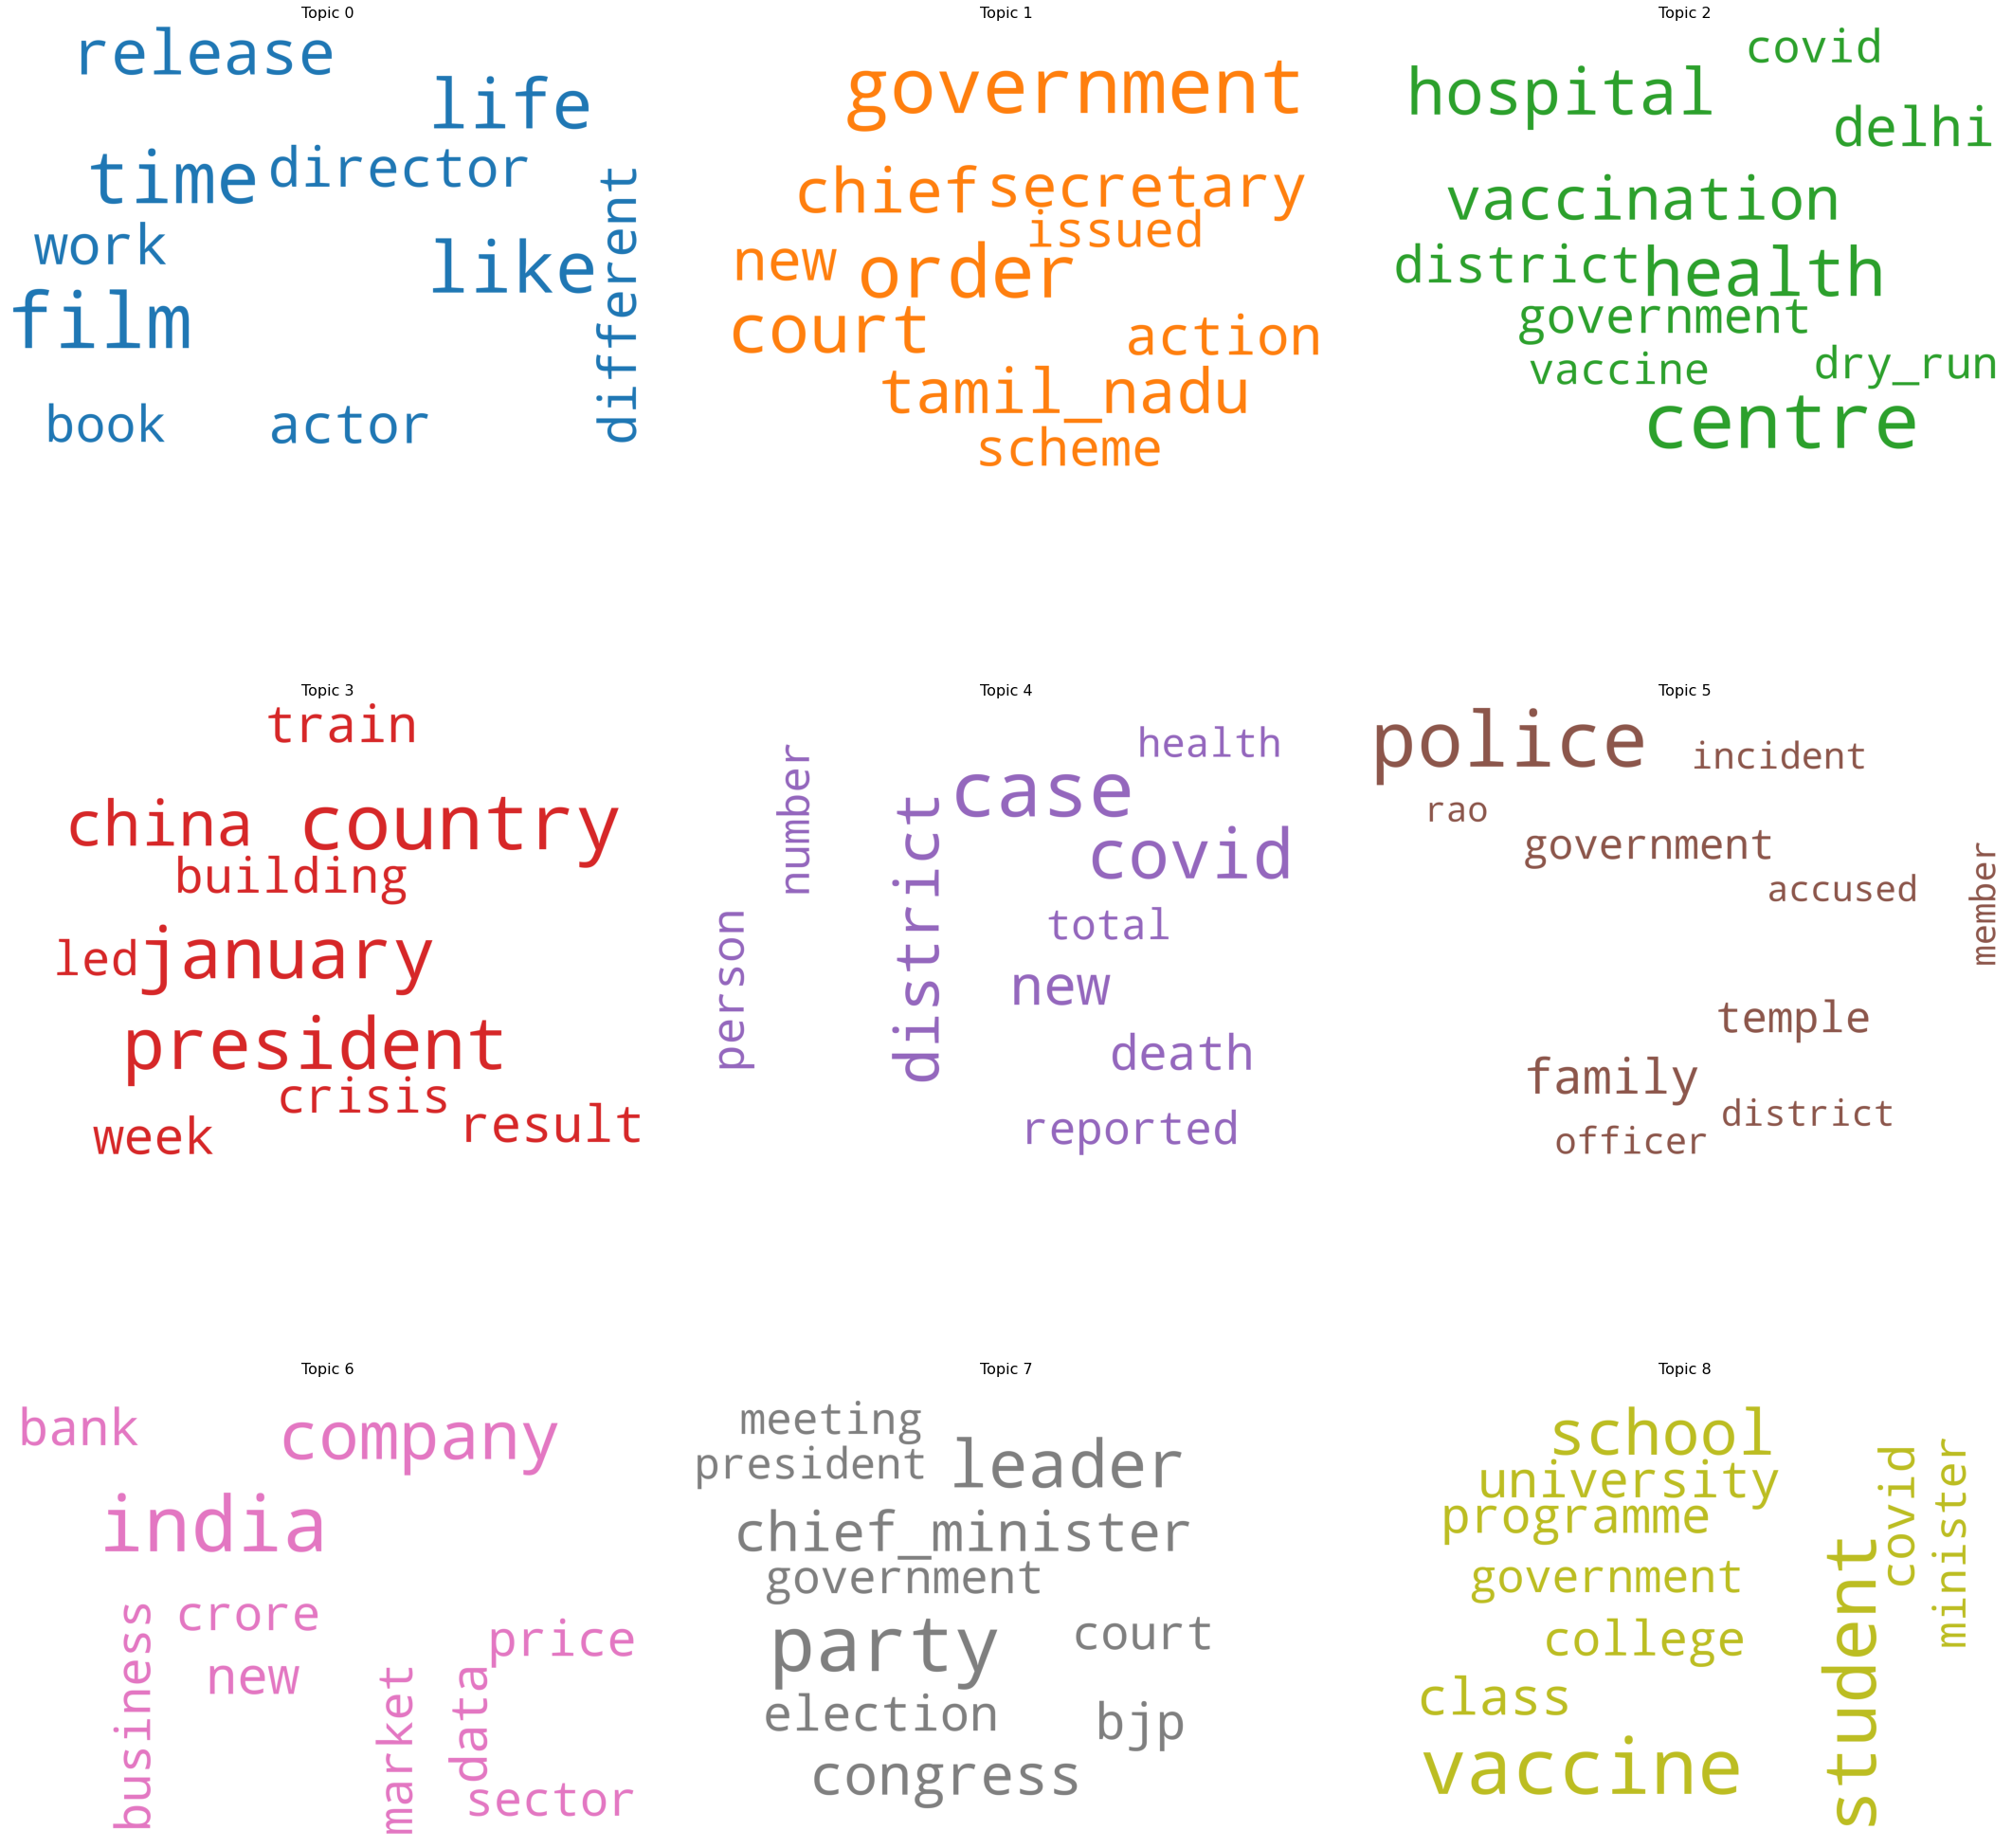

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=40,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

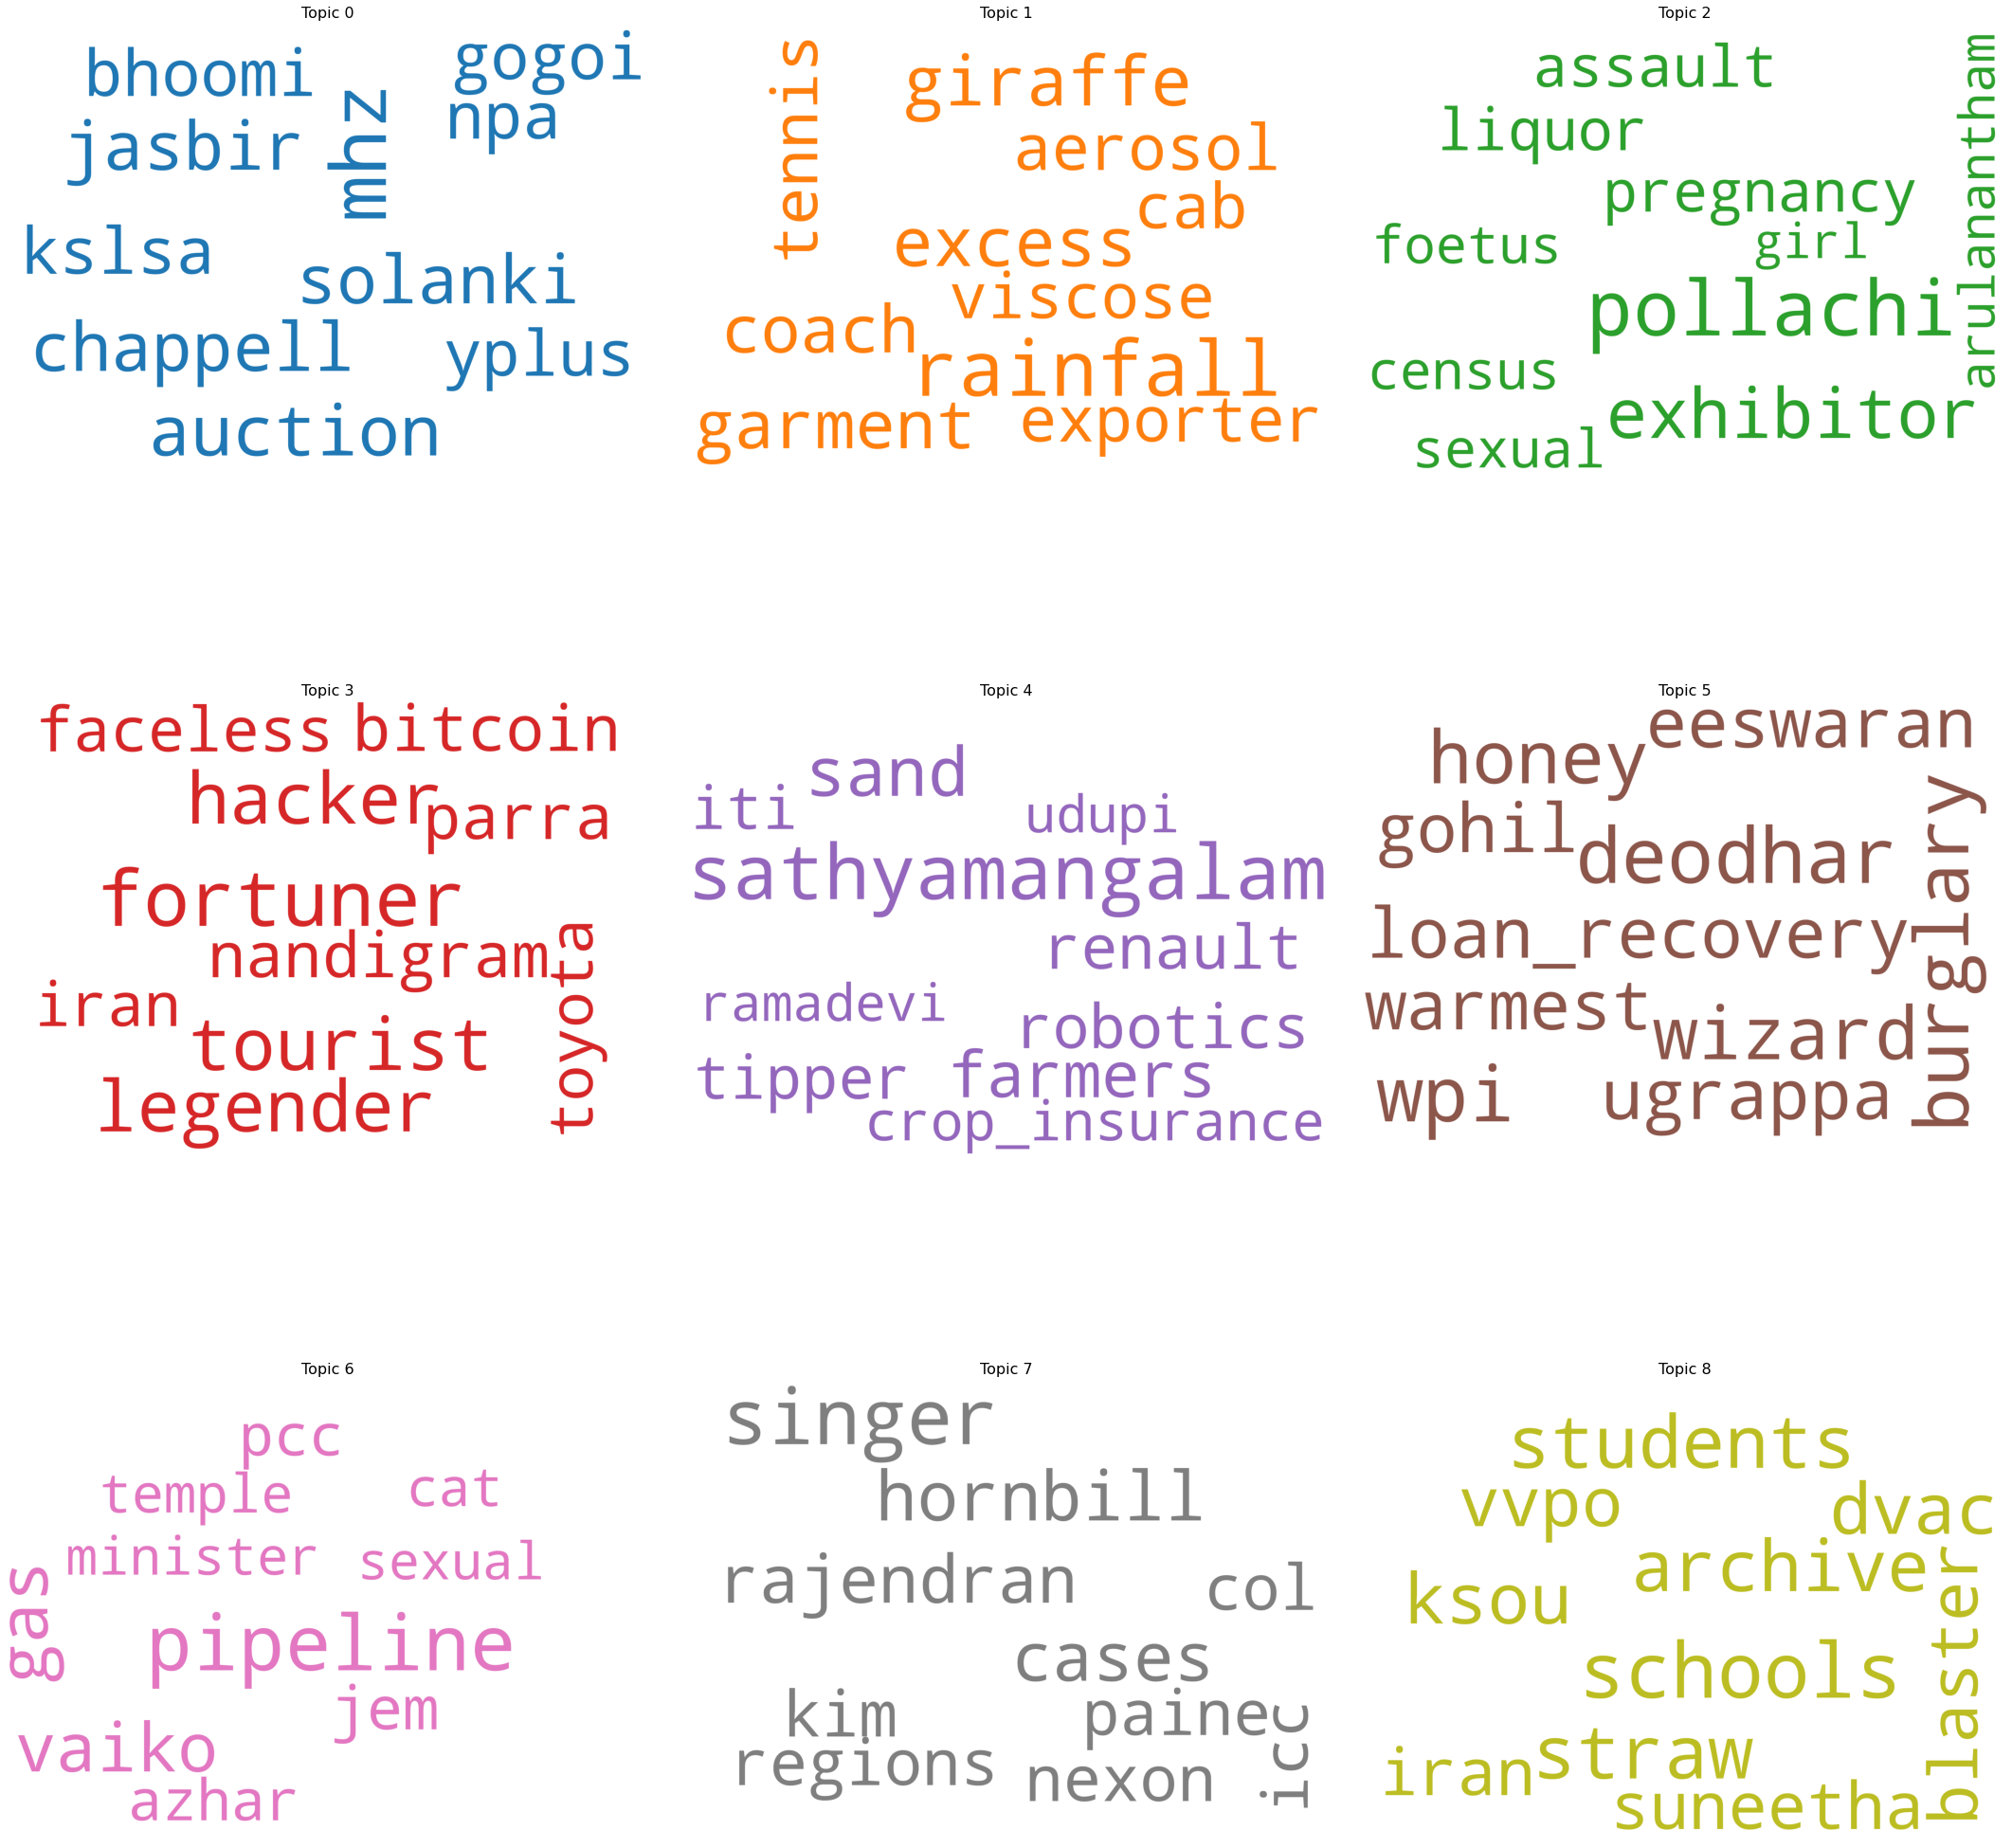

In [ ]:
# FOR TF-IDF
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# Assigning different colors to each word cloud
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

# Drawing the word cloud 
Word_cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  contour_color='steelblue',
                  color_func=lambda *args, **kwargs: cols[i])

topics = lda_model_tfidf.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    Word_cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(Word_cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=30, hspace=30)
plt.axis('off')
plt.margins(x=20, y=20)
plt.tight_layout()
plt.show()

In [ ]:
print(test)

                         File_Name  ... Unnamed: 0
234   thehindu_jan_8_file_235.json  ...      234.0
354   thehindu_jan_1_file_388.json  ...        NaN
63     thehindu_jan_5_file_74.json  ...        NaN
23     thehindu_jan_6_file_24.json  ...       23.0
182  thehindu_jan_12_file_198.json  ...        NaN
..                             ...  ...        ...
134   thehindu_jan_1_file_147.json  ...        NaN
214   thehindu_jan_9_file_215.json  ...      214.0
282  thehindu_jan_10_file_283.json  ...      282.0
94   thehindu_jan_13_file_108.json  ...        NaN
13     thehindu_jan_8_file_14.json  ...       13.0

[474 rows x 3 columns]


In [ ]:
test_list = test["Text"].to_list()

In [ ]:
test_list

[['open',
  'access',
  'manuguru',
  'solar',
  'power',
  'agreement',
  'transco',
  'discom',
  'agreement',
  'transco',
  'discom',
  'tripartite',
  'agreement',
  'open',
  'access',
  'solar',
  'power',
  'generated',
  'manuguru',
  'area',
  'singareni',
  'colliery',
  'company',
  'ltd',
  'sccl',
  'signed',
  'friday',
  'sccl',
  'transmission',
  'corporation',
  'telangana',
  'ltd',
  'tstransco',
  'northern',
  'power',
  'distribution',
  'company',
  'telangana',
  'ltd',
  'tsnpdclthe',
  'agreement',
  'enables',
  'sccl',
  'avail',
  'solar',
  'power',
  'generated',
  'megawatt',
  'manuguru',
  'area',
  'plant',
  'need',
  'manuguru',
  'illendu',
  'area',
  'transmission',
  'distribution',
  'line',
  'tstransco',
  'northern',
  'discom',
  'purchase',
  'remaining',
  'power',
  'discomaccording',
  'sccl',
  'manuguru',
  'solar',
  'plant',
  'generation',
  'plan',
  'agreement',
  'signed',
  'provision',
  'renew',
  'power',
  'generated',
  

In [ ]:
topic_dist = []
for i in range(len(test_list[0:10])):
  text = test_list[i]
  print("The topic dominant in the doccument number {}: ".format(i+1),lda_model[dictionary.doc2bow(text)])
  topic_dist.append(lda_model[dictionary.doc2bow(text)])

The topic dominant in the doccument number 1:  [(0, 0.038113177), (1, 0.03413221), (2, 0.033593897), (3, 0.06740737), (4, 0.04638851), (5, 0.053331356), (6, 0.044790395), (7, 0.050196674), (8, 0.0329486), (9, 0.23266324), (10, 0.039519142), (11, 0.3269154)]
The topic dominant in the doccument number 2:  [(0, 0.07728062), (1, 0.07122877), (2, 0.062696), (3, 0.05707708), (4, 0.0549471), (5, 0.06506474), (6, 0.052340534), (7, 0.12338147), (8, 0.0964235), (9, 0.06431912), (10, 0.052272405), (11, 0.22296867)]
The topic dominant in the doccument number 3:  [(0, 0.23164508), (1, 0.09468991), (2, 0.042159352), (3, 0.05022266), (4, 0.059511445), (5, 0.055807367), (6, 0.07860822), (7, 0.09971275), (8, 0.1207429), (9, 0.053910617), (10, 0.055250715), (11, 0.057738993)]
The topic dominant in the doccument number 4:  [(0, 0.044823907), (1, 0.051827196), (2, 0.051761184), (3, 0.07268144), (4, 0.07196361), (5, 0.2562111), (6, 0.047418837), (7, 0.061138563), (8, 0.07606025), (9, 0.06390364), (10, 0.13

In [ ]:
# Creating the dataframe of the test dataset 
df_test = pd.DataFrame(zip(test["File_Name"], test_list, dist_list), columns = ["File_Name", "Text", "Distribution"])

In [ ]:
print(df_test[0:10])

                       File_Name  ...                                       Distribution
0   thehindu_jan_8_file_235.json  ...  [(0, 0.038113173), (1, 0.034132197), (2, 0.033...
1   thehindu_jan_1_file_388.json  ...  [(0, 0.07728041), (1, 0.07122896), (2, 0.06269...
2    thehindu_jan_5_file_74.json  ...  [(0, 0.23164204), (1, 0.094689876), (2, 0.0421...
3    thehindu_jan_6_file_24.json  ...  [(0, 0.04482384), (1, 0.05182743), (2, 0.05176...
4  thehindu_jan_12_file_198.json  ...  [(0, 0.07740685), (1, 0.0765289), (2, 0.057061...
5   thehindu_jan_1_file_245.json  ...  [(0, 0.050323192), (1, 0.067411855), (2, 0.071...
6   thehindu_jan_4_file_117.json  ...  [(0, 0.076724514), (1, 0.04859568), (2, 0.0464...
7   thehindu_jan_4_file_204.json  ...  [(0, 0.04821251), (1, 0.06768358), (2, 0.04706...
8   thehindu_jan_8_file_213.json  ...  [(0, 0.060089123), (1, 0.055146113), (2, 0.054...
9   thehindu_jan_14_file_22.json  ...  [(0, 0.08336308), (1, 0.06505992), (2, 0.07824...

[10 rows x 3 columns